# Разведочный анализ данных в задаче об оценках студентов.

Будем работать с данными, в которых представлены оценки студентов за экзамены по математике, чтению и письму, а также различные характеристики студентов.

## Цели
#### 1. Понять, как различные факторы (экономические, социальные, личные) влияют на оценки студентов на экзаменах.
#### 2. Познакомиться с библиотекой seaborn.

## Источник
https://www.kaggle.com/datasets

#### Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Зафиксируем минимальный балл для сдачи экзамена

In [2]:
passmark = 40

#### Считайте данные из csv файла StudentsPerformance.csv

In [3]:
#your code here
df = pd.read_csv("StudentsPerformance.csv")

#### Напечатаем первые несколько строк в таблице

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Выведите на экран размеры полученной таблицы

In [5]:
#your code here
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [7]:
#your code here
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Посмотрим на распределение оценок по математике (Math), чтению (Reading) и письму (Writing).

C:\Users\elena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


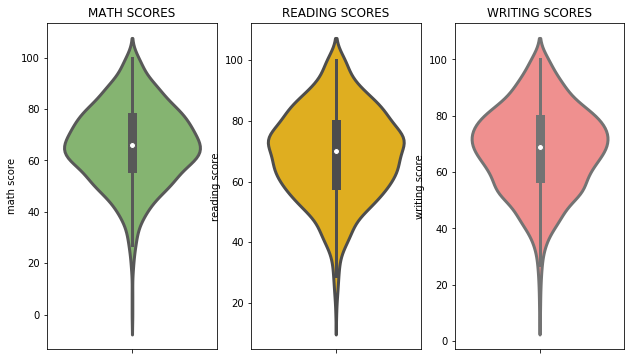

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plt.show()

Из графиков видно, что большинство студентов набрали 60-80 по математике и 50-80 по чтению и письму.

#### Проверьте, есть ли в таблице пропущенные значения

In [9]:
#your code here
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Посмотрим, как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)
и от пола (gender)**

Постройте график (гистограмму, любую нравящуюся вам визуализацию) зависимости оценок по математике (math score) от test preparation course и от gender. То же самое - для оценок за reading и writing.

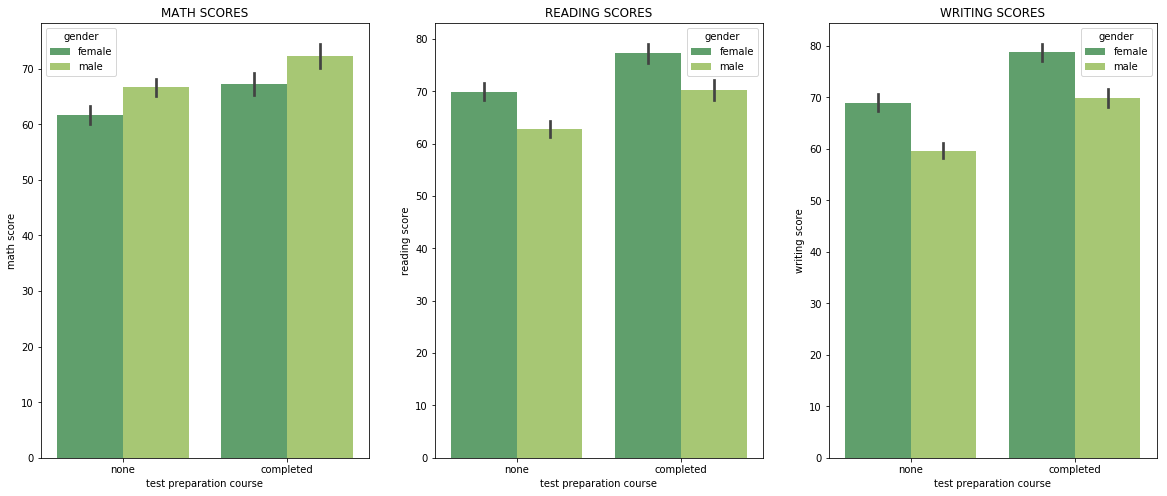

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',\
           palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',\
           palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',\
           palette='summer')
plt.title('WRITING SCORES')
plt.show()

Какие выводы можно сделать из этих графиков?

Следующая функция (pairplot) - это визуализация, которая помогает понять, как связаны между собой все пары признаков.

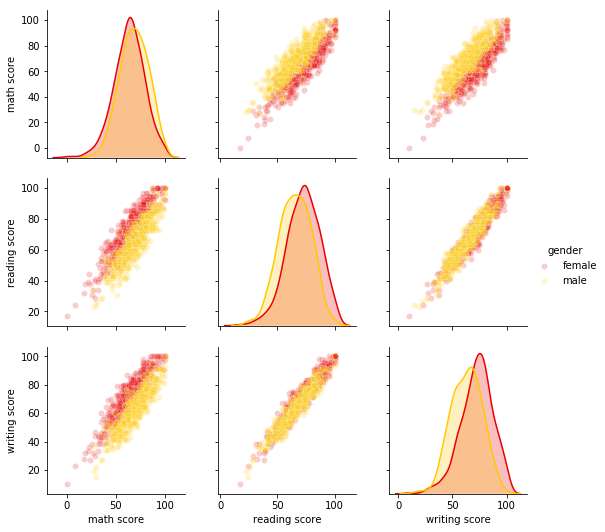

In [11]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

Как влияет lunch на оценки?

Выведите на экран все различные значения из столбца lunch

In [12]:
#your code here
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Постройте barplot, отражающий зависимость оценок по math от test preparation course; сделайте разделение по 'lunch'.
То же самое - для reading и writing.

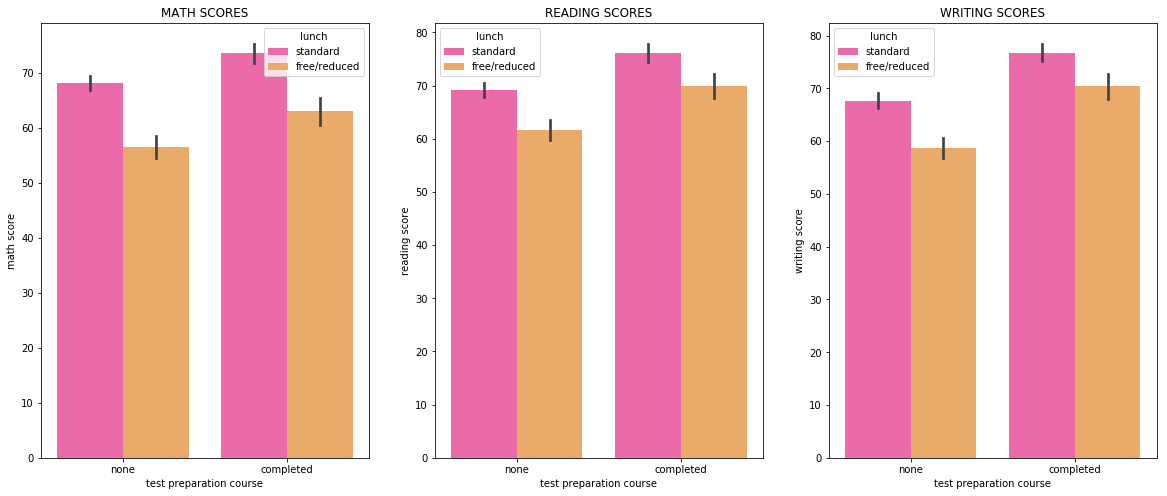

In [13]:
#your code here
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch',\
           palette='spring')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch',\
           palette='spring')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',\
           palette='spring')
plt.title('WRITING SCORES')
plt.show()

Как зависят баллы от типа lunch?

####  Исследуем оценки по математике (Math)

Постройте гистограмму (plt.hist или sns.distplot) распределения оценок студентов по математике.

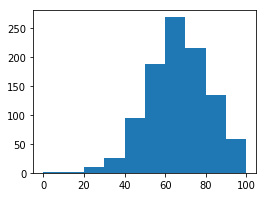

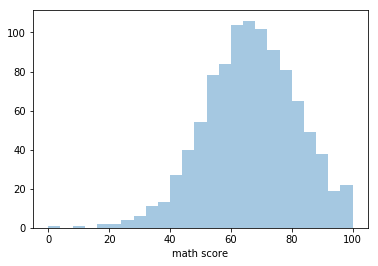

In [19]:
#your code here
plt.figure(figsize=(4,3))
plt.hist(df['math score']) #bins
plt.show()

sns.distplot(df['math score'], kde=False) #bins
plt.show()

#### Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

In [22]:
#your code here
df['Math_PassStatus'] = np.where(df['math score'] < passmark, 'F', 'P')

#ИЛИ

df['Math_PassStatus'] = df['math score'].apply(lambda x: 'F' if x < passmark else 'P')

In [23]:
df.Math_PassStatus

0      P
1      P
2      P
3      P
4      P
      ..
995    P
996    P
997    P
998    P
999    P
Name: Math_PassStatus, Length: 1000, dtype: object

Как зависит успех сдачи экзамена от уровня образования? 

Постройте гистограмму (countplot) распределения студентов по уровням образования

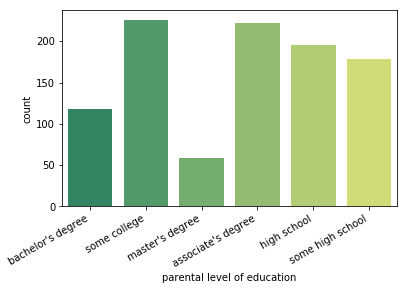

In [26]:
#your code here
fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, palette='summer')
fig.autofmt_xdate()

Создайте countplot, отображающий зависимость Math_PassStatus от parental level of education 

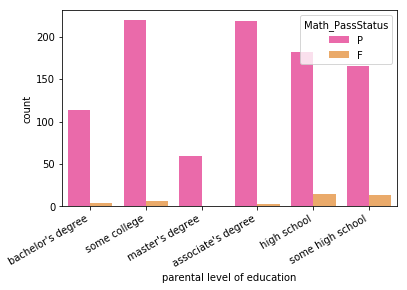

In [28]:
#your code here
fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='Math_PassStatus', palette='spring')
fig.autofmt_xdate()

По аналогии с колонкой Math_PassStatus создайте колонки Reading_PassStatus и Writing_PassStatus.

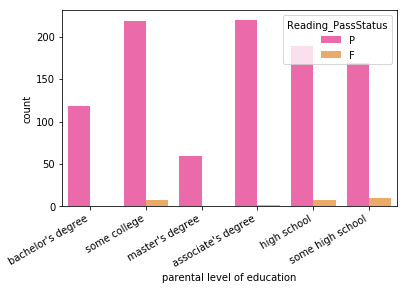

In [29]:
#your code here#your code here
df['Reading_PassStatus'] = np.where(df['reading score'] < passmark, 'F', 'P')

fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='Reading_PassStatus', palette='spring')
fig.autofmt_xdate()

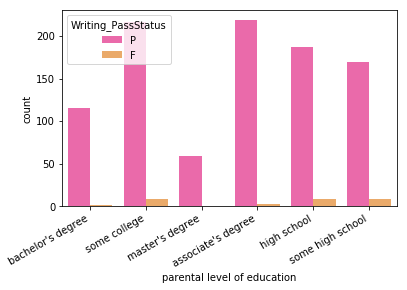

In [30]:
#your code here#your code here
df['Writing_PassStatus'] = np.where(df['writing score'] < passmark, 'F', 'P')

fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='Writing_PassStatus', palette='spring')
fig.autofmt_xdate()

#### Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [34]:
#your code here
df['OverAll_PassStatus'] = df.apply(lambda x: 'F' if x['Math_PassStatus'] == 'F' or x['Reading_PassStatus'] == 'F'  
                                                  or x['Writing_PassStatus'] == 'F' else 'P', axis=1)
df['OverAll_PassStatus'].value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

Создайте диаграмму, отображающую зависимость OverAll_PassStatus от parental level of education

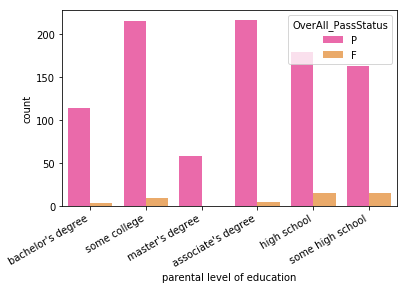

In [35]:
#your code here
fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='OverAll_PassStatus', palette='spring')
fig.autofmt_xdate()

Построим модель, которая по полу (gender) и ланчу (lunch) предсказывает, сдал студент все экзамены или нет (OverAll_PassStatus).

In [36]:
df['gender_num'] = df['gender'].apply(lambda x: 0 if x == 'male' else 1)
df['lunch_num'] = df['lunch'].apply(lambda x: 0 if x == 'standard' else 1)
df['target'] = df['OverAll_PassStatus'].apply(lambda x: 1 if x == 'P' else 0)

X = df[['gender_num','lunch_num']] #матрица объект-признак
y = df['target'] #целевая переменная

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 2), (700,), (300, 2), (300,))

In [45]:
from sklearn.linear_model import LogisticRegression #это классификатор!

model = LogisticRegression() #классификатор для решения нашей задачи
model.fit(X_train, y_train) #обучаем модель на трейне

prediction = model.predict(X_test) #делаем предсказание на тестовых данных

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, prediction))

0.96


In [50]:
prediction_train = model.predict(X_train) #делаем предсказание на тренировочных данных
print(accuracy_score(y_train, prediction_train))

0.9442857142857143


Построим модель, которая по полу (gender) и ланчу (lunch) предсказывает балл студента по математике (math score).

In [51]:
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
from sklearn.linear_model import LinearRegression

#your code here
model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

In [55]:
prediction[:5]

array([72.29307021, 67.14158334, 55.82915879, 60.98064566, 72.29307021])

In [56]:
y_test[:5]

436    75
701    57
169    67
757    70
163    52
Name: math score, dtype: int64

In [53]:
from sklearn.metrics import mean_squared_error

#your code here
mean_squared_error(y_test, prediction)

199.04641091751662

In [54]:
prediction_train = model.predict(X_train)

mean_squared_error(y_train, prediction_train)

194.35989361115034

#### Найдем распределение средней оценки за все экзамены:

1. Создайте столбец Total_Marks и запишите в него суммарный балл каждого студента за все дисциплины.

2. Создайте столбец Percentage, в который запишите средний балл студента за все дисциплины.

3. Нарисуйте гистограмму распределения среднего балла.

In [ ]:
#your code here
df['Total_Marks'] = ...
df['Percentage'] = ...

**Постройте график, отображающий зависимость итогового балла (Total_Marks) от уровня образования (parental level of education).**

In [ ]:
#your code here

#### Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 80 = A
####      70-80 = B
####      60-70 = C
####      50-60 = D
####      40-50 = E
####    меньше 40 = F (Fail)

1. Создайте вспомогательную функцию, которая будет по среднему баллу выставлять оценку студенту по данным выше критериям.

2. Создайте столбец Grade и запишите в него оценку каждого студента.

3. Выведите количество студентов, получивших каждую из оценок.

In [ ]:
def GetGrade(Percentage):
    #your code here
    
#your code here
df['Grade'] = ...

#### Нарисуем распределение полученных оценок

In [ ]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

Нарисуйте гистограмму распределения оценок в зависимости от уровня образования.

In [ ]:
#your code here

Посмотрим на лучших студентов (которые получили больше 90 баллов за каждый экзамен).

In [ ]:
df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['Total_Marks'],ascending=False)

Посмотрим на распределение оценок в зависимости от пола для каждой этнической группы

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')
plt.show()

### Сделайте выводы: от какого фактора больше всего зависят оценки студента? от какого фактора они зависят меньше всего? какие зависимости между признаками кажутся вам наиболее значимыми?

In [ ]:
#your code here